In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo csv
dados = pd.read_csv('dados_coletados_certos.csv',thousands='.')

In [8]:
# Verificar as primeiras linhas do dataframe
print(dados.head())

  Destino Inicial Destino Final  Data  Preço
0             ams           bhz    21   3011
1             ams           bhz    22   2422
2             ams           bhz    23   2396
3             ams           bhz    24   3007
4             ams           bhz    25   2962


In [32]:
# Separar os dados em saida e chegada de BH e destinos intermediários
destinos_bh = dados[(dados['Destino Inicial'] == 'bhz') | (dados['Destino Final'] == 'bhz')]
destinos_intermediarios = dados[(dados['Destino Inicial'] != 'bhz') & (dados['Destino Final'] != 'bhz')]

# Calcular a média dos preços saindo e chegando em Belo Horizonte
media_precos_bh = destinos_bh['Preço'].mean()
print("Média de preços para destinos envolvendo BHZ: {:.2f}".format(media_precos_bh))

# Calcular a média dos preços para destinos intermediários
media_precos_intermediarios = destinos_intermediarios['Preço'].mean()
print("Média de preços para destinos intermediários: {:.2f}".format(media_precos_intermediarios))

Média de preços para destinos envolvendo BHZ: 3010.31
Média de preços para destinos intermediários: 340.68


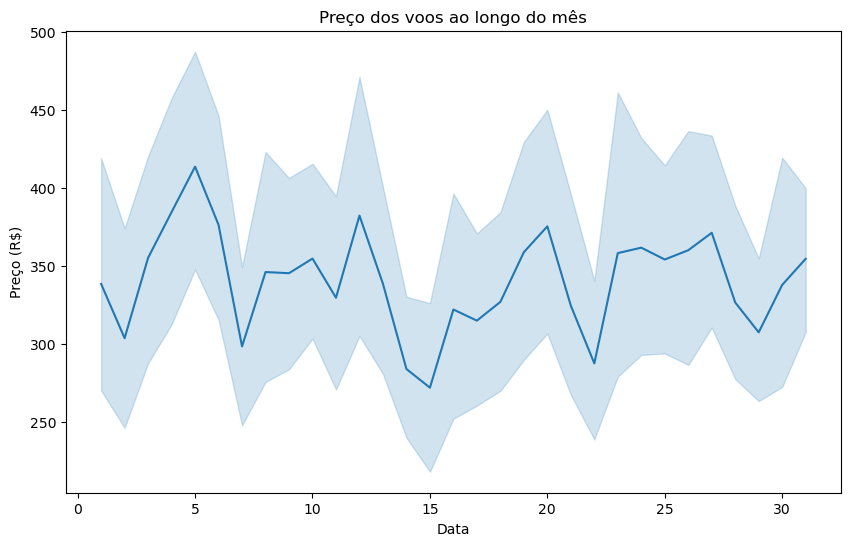

In [89]:
# Análise da sazonalidade para destinos intermediários
plt.figure(figsize=(10, 6))
sns.lineplot(data=destinos_intermediarios, x='Data', y='Preço')
plt.title('Preço dos voos ao longo do mês')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.show()

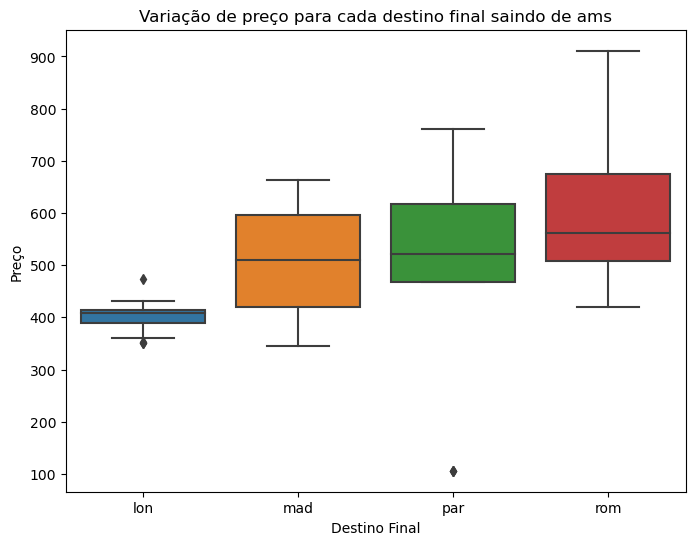

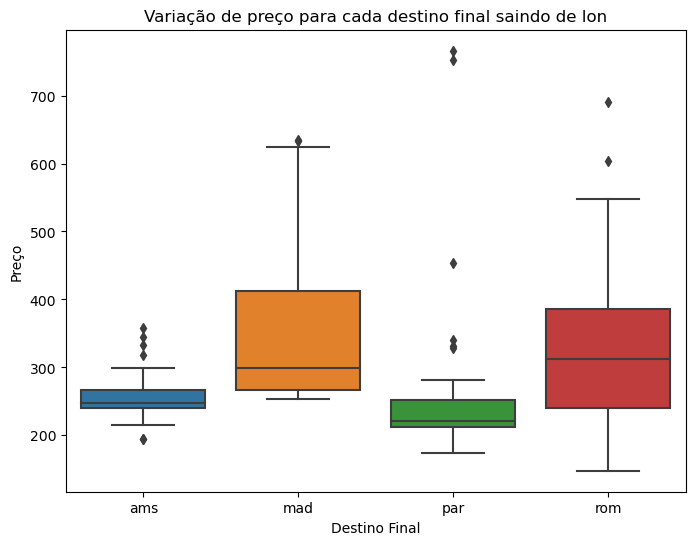

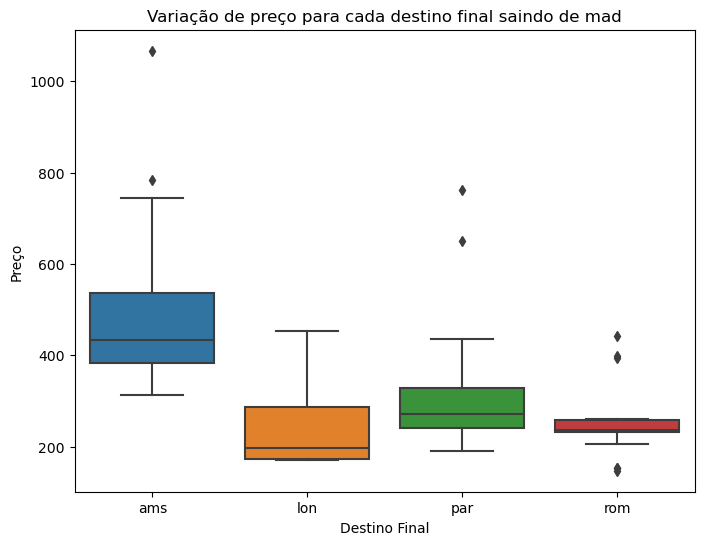

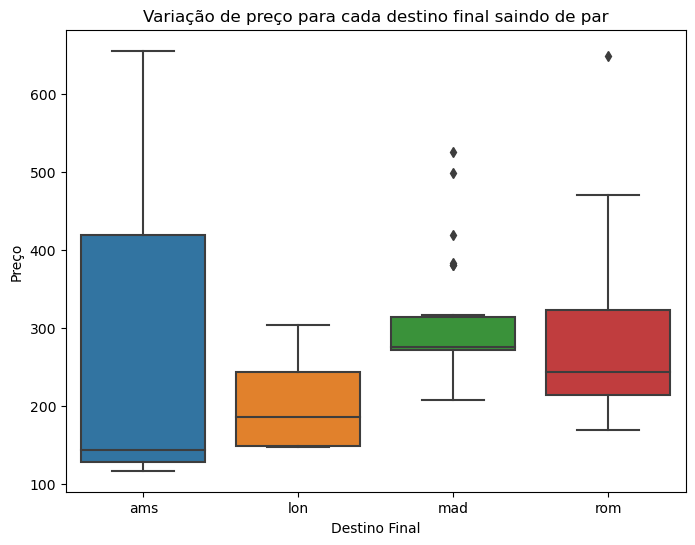

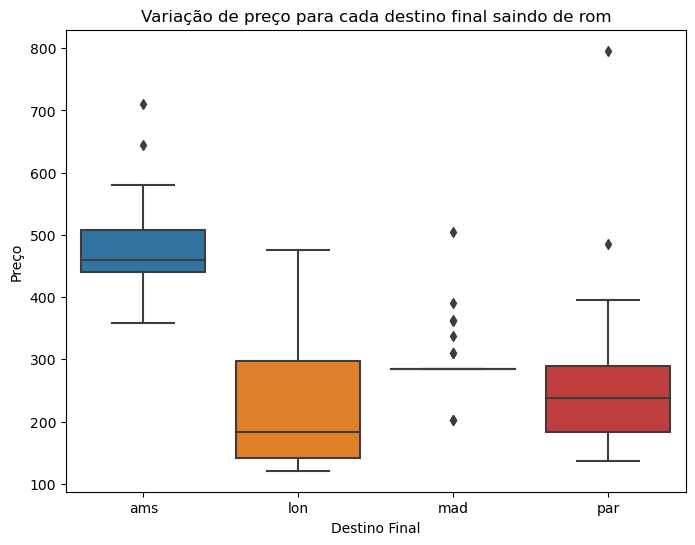

In [36]:
destinos_iniciais = destinos_intermediarios['Destino Inicial'].unique()

# Criar um boxplot para cada destino inicial, mostrando a variação de preço para o respectivo destino final
for destino_inicial in destinos_iniciais:
    # Filtrar os dados para o destino inicial atual
    dados_destino = destinos_intermediarios[destinos_intermediarios['Destino Inicial'] == destino_inicial]
    
    # Criar o boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dados_destino, x='Destino Final', y='Preço')
    plt.title(f'Variação de preço para cada destino final saindo de {destino_inicial}')
    plt.xlabel('Destino Final')
    plt.ylabel('Preço')
    plt.show()

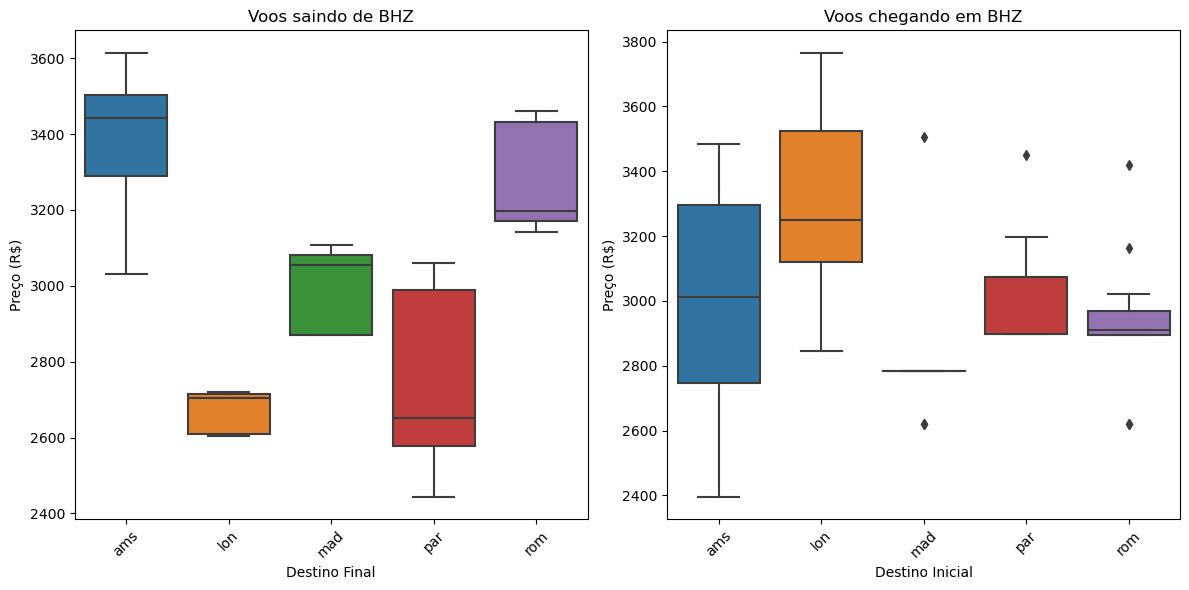

In [90]:
# Separar os voos que saem de BHZ
voos_saindo_bhz = destinos_bh[destinos_bh['Destino Inicial'] == 'bhz']

# Separar os voos que chegam em BHZ
voos_chegando_bhz = destinos_bh[destinos_bh['Destino Final'] == 'bhz']

# Criar os boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=voos_saindo_bhz, x='Destino Final', y='Preço')
plt.title('Voos saindo de BHZ')
plt.xlabel('Destino Final')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=voos_chegando_bhz, x='Destino Inicial', y='Preço')
plt.title('Voos chegando em BHZ')
plt.xlabel('Destino Inicial')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

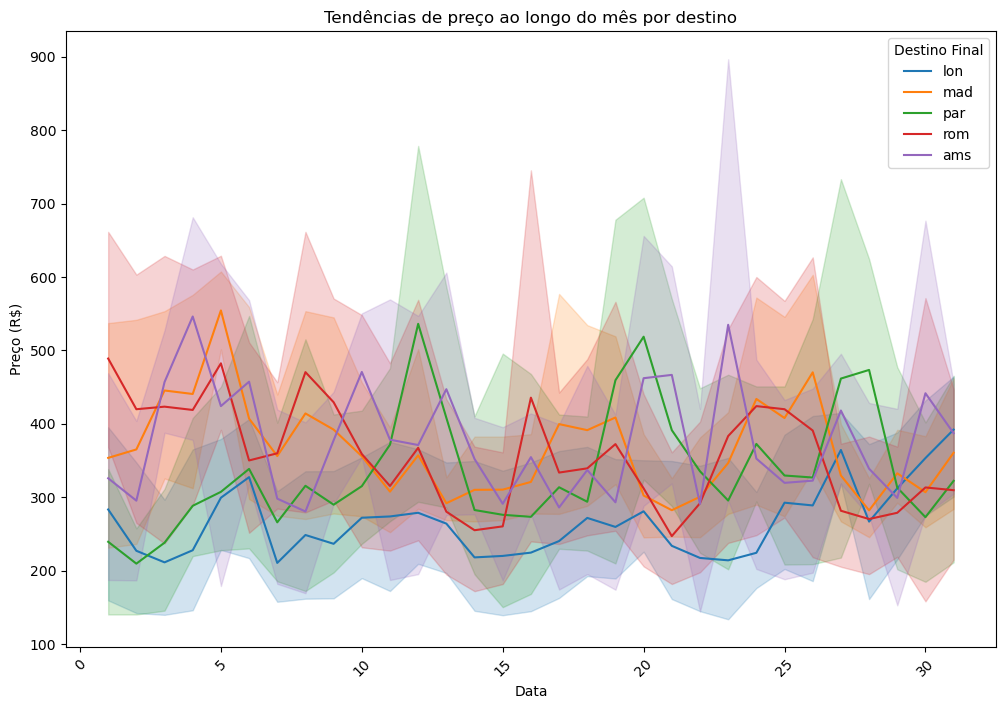

In [91]:
# Análise das tendências de preço ao longo do mês por destino
plt.figure(figsize=(12, 8))
sns.lineplot(data=destinos_intermediarios, x='Data', y='Preço', hue='Destino Final')
plt.title('Tendências de preço ao longo do mês por destino')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.legend(title='Destino Final')
plt.show()

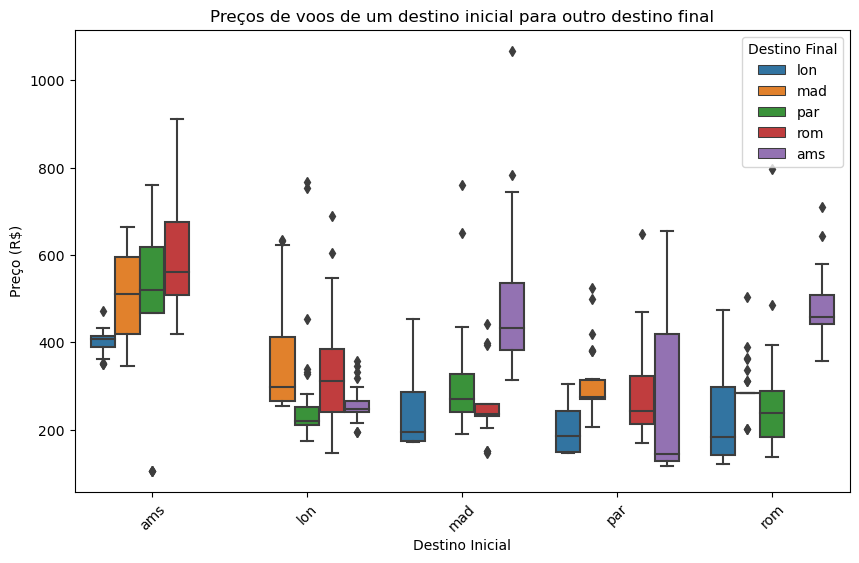

In [93]:
# Boxplot para analisar os preços de um destino a outro
plt.figure(figsize=(10, 6))
sns.boxplot(data=destinos_intermediarios, x='Destino Inicial', y='Preço', hue='Destino Final')
plt.title('Preços de voos de um destino inicial para outro destino final')
plt.xlabel('Destino Inicial')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.legend(title='Destino Final')
plt.show()

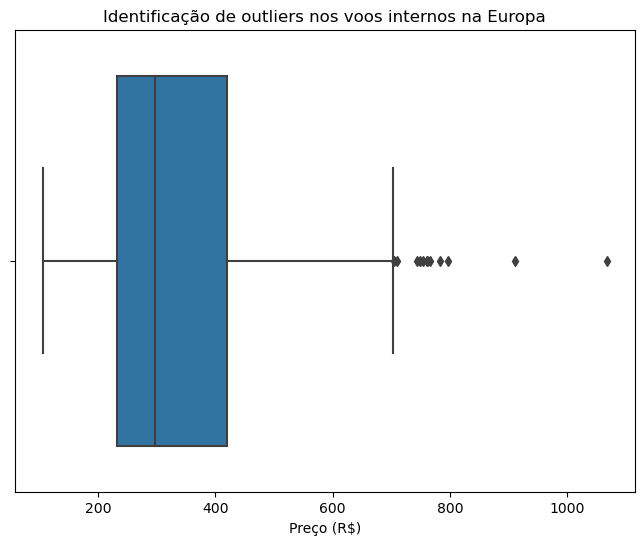

In [95]:
# Identificação de outliers - voos internos
plt.figure(figsize=(8, 6))
sns.boxplot(data=destinos_intermediarios, x='Preço')
plt.title('Identificação de outliers nos voos internos na Europa')
plt.xlabel('Preço (R$)')
plt.show()

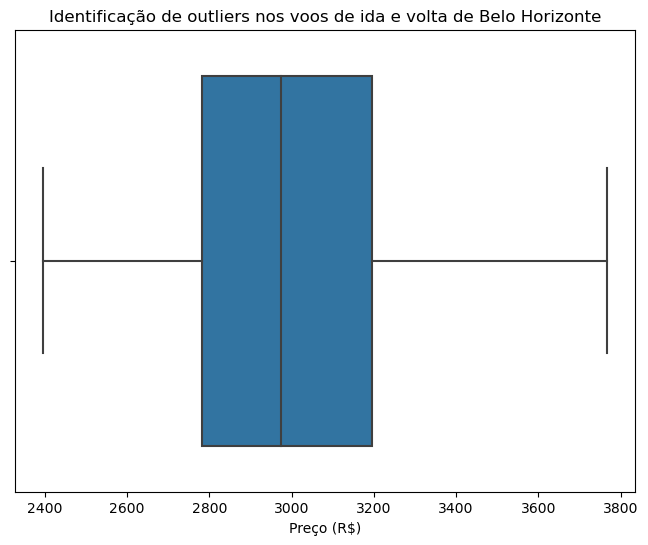

In [108]:
# Identificação de outliers - voos de ida e volta para BH
plt.figure(figsize=(8, 6))
sns.boxplot(data=destinos_bh, x='Preço')
plt.title('Identificação de outliers nos voos de ida e volta de Belo Horizonte')
plt.xlabel('Preço (R$)')
plt.show()

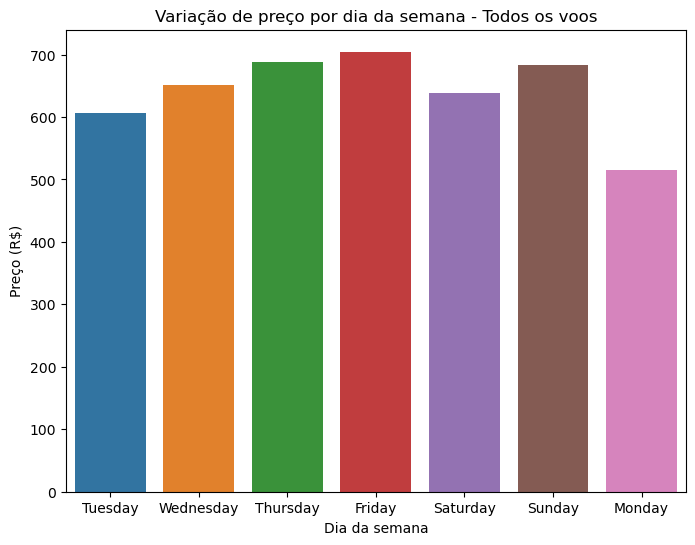

In [109]:
# Análise da variação de preço por dia da semana (todos os voos):

# Adicionando uma coluna nova com a data completa
dados['Data_Completa'] = '2024-05-' + dados['Data'].astype(str)

# converter a coluna 'Data_Completa' para datetime objects
dados['Dia_da_Semana'] = pd.to_datetime(dados['Data_Completa']).dt.day_name()

plt.figure(figsize=(8, 6))
sns.barplot(data=dados, x='Dia_da_Semana', y='Preço', ci=None)
plt.title('Variação de preço por dia da semana - Todos os voos')
plt.xlabel('Dia da semana')
plt.ylabel('Preço (R$)')
plt.show()

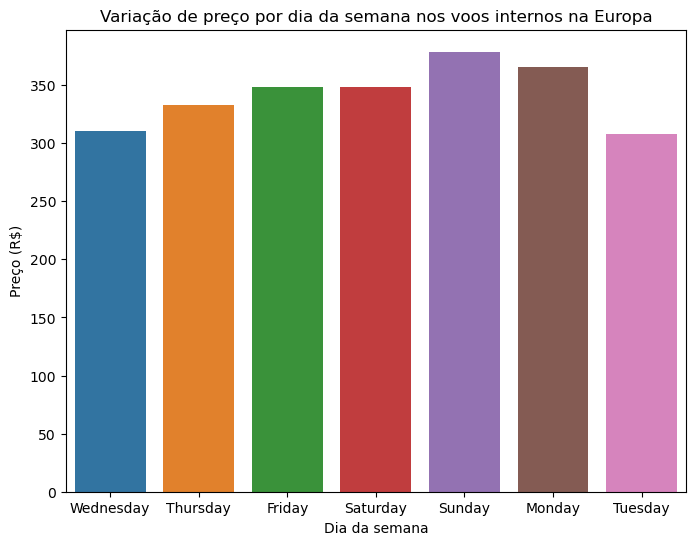

In [113]:
destinos_intermediarios = dados[(dados['Destino Inicial'] != 'bhz') & (dados['Destino Final'] != 'bhz')]
plt.figure(figsize=(8, 6))
sns.barplot(data=destinos_intermediarios, x='Dia_da_Semana', y='Preço', ci=None)
plt.title('Variação de preço por dia da semana nos voos internos na Europa')
plt.xlabel('Dia da semana')
plt.ylabel('Preço (R$)')
plt.show()

In [111]:
destinos_bh = dados[(dados['Destino Inicial'] == 'bhz') | (dados['Destino Final'] == 'bhz')]

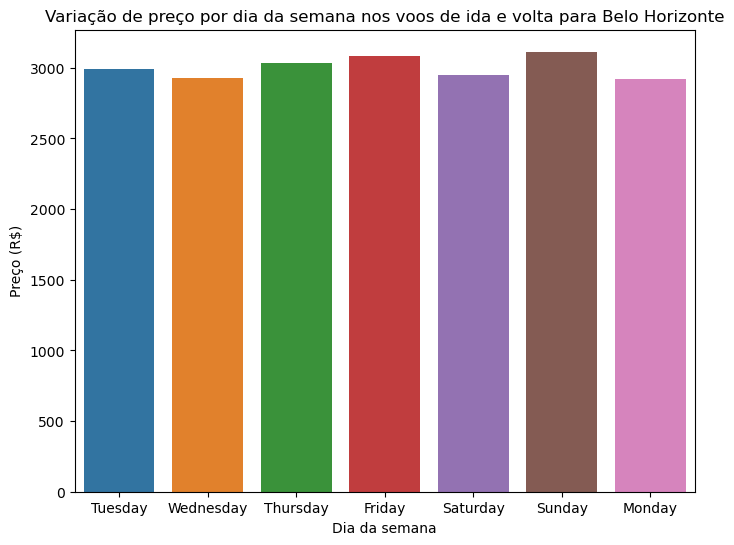

In [114]:
plt.figure(figsize=(8, 6))
sns.barplot(data=destinos_bh, x='Dia_da_Semana', y='Preço', ci=None)
plt.title('Variação de preço por dia da semana nos voos de ida e volta para Belo Horizonte')
plt.xlabel('Dia da semana')
plt.ylabel('Preço (R$)')
plt.show()

In [70]:
# Lista de cidades
cidades = ['bhz', 'ams', 'rom', 'mad', 'par', 'lon']

# Dicionário para armazenar as distâncias entre as cidades
distancias = {
    'bhz': {'bhz': 0, 'ams': 9318, 'rom': 8989, 'mad': 7895, 'par': 8914, 'lon': 9012},
    'ams': {'bhz': 9318, 'ams': 0, 'rom': 1298, 'mad': 1481, 'par': 430, 'lon': 357},
    'rom': {'bhz': 8989, 'ams': 1298, 'rom': 0, 'mad': 1365, 'par': 1107, 'lon': 1435},
    'mad': {'bhz': 7895, 'ams': 1481, 'rom': 1365, 'mad': 0, 'par': 1052, 'lon': 1263},
    'par': {'bhz': 8914, 'ams': 430, 'rom': 1107, 'mad': 1052, 'par': 0, 'lon': 343},
    'lon': {'bhz': 9012, 'ams': 357, 'rom': 1435, 'mad': 1263, 'par': 343, 'lon': 0}
}

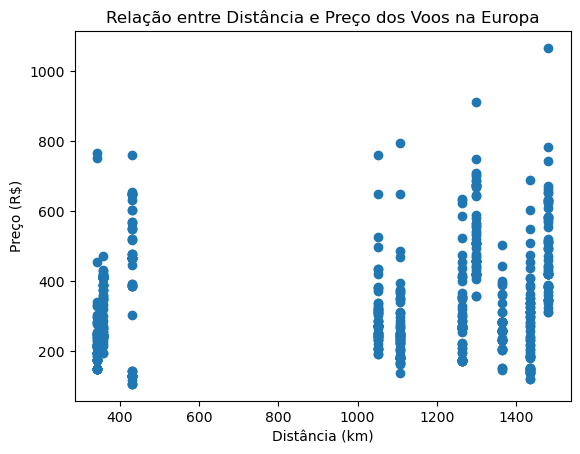

In [83]:
# Calculando a média dos preços para rotas com distâncias similares
dados['Distancia'] = dados.apply(lambda row: distancias[row['Destino Inicial']][row['Destino Final']], axis=1)

# Atribuir modificacoes aos novos dataframes
destinos_bh = dados[(dados['Destino Inicial'] == 'bhz') | (dados['Destino Final'] == 'bhz')]
destinos_intermediarios = dados[(dados['Destino Inicial'] != 'bhz') & (dados['Destino Final'] != 'bhz')]

# Visualizando a relação entre distâncias e preços em um gráfico de dispersão
plt.scatter(destinos_intermediarios['Distancia'], destinos_intermediarios['Preço'])
plt.xlabel('Distância (km)')
plt.ylabel('Preço (R$)')
plt.title('Relação entre Distância e Preço dos Voos na Europa')
plt.show()

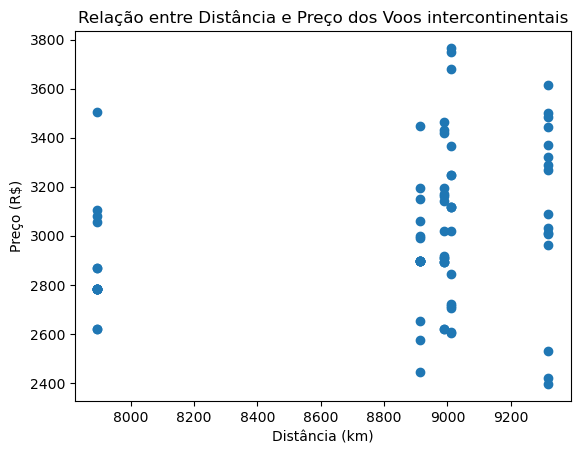

In [85]:
plt.scatter(destinos_bh['Distancia'], destinos_bh['Preço'])
plt.xlabel('Distância (km)')
plt.ylabel('Preço (R$)')
plt.title('Relação entre Distância e Preço dos Voos intercontinentais')
plt.show()